# Arquitecturas de las CNNs

[Publicación](https://adeshpande3.github.io/adeshpande3.github.io/The-9-Deep-Learning-Papers-You-Need-To-Know-About.html)

## [ImageNet](http://image-net.org/index)
- Base de datos de imágenes
- Organizada de acuerdo a la jerarquía WordNet (synonyms called synsets). Hay mas de 100.000 synsets de los cuales mas de 80.000 son sinónimos
- En promedio 1000 imágenes para describir cada synset
- [Estadisticas del dataset](http://image-net.org/about-stats)

## [Competencias desde 2010](http://www.image-net.org/challenges/LSVRC/) ImageNet Large Scale Visual Recognition Challenge (LSVRC)
Dieron como resultados de las investigaciones una serie de arquitecturas muy populares
### AlexNet [(paper)](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)
- 2012 
- Error de top-5 de 15.3%, más de 10.8% arriba del segundo. 
- ImageNet: En 1.2 millones de imágenes de alta resolución, 1000 clases
- Diseñada por: SuperVision group, consisting of Alex Krizhevsky, Geoffrey Hinton, and Ilya Sutskever.

**Lo novedoso**: Dropout, RELUs

**Arquitectura:**
- CNN
- Down-sampled a 256 × 256 (Originales en alta resolución)
- Luego del data augmentation quedan en 224 x 224
- Rectangulares con center-crop (Lado mas corto 256)
- 60 millones de parámetros
- 650 mil neuronas
- 5 capas convolucionales
- Algunos seguidos de capas pooling
- 3 capas densas
- SoftMax de 1000 categorias (1000 neuronas a la salida)
- RELUs en vez de Sigmoideas
- Dropout para evitar regularización

**Entrenamiento:**
- CUDA para soporte de GPU
- Data augmentation
- SGD
- Batch size = 128
- Momentum 0.9
- Learning rate = 0.01
- weight decay of 0.0005 (equivalente a L2 regularization)
- 5 a 6 días de entrenamiento en 2 [GTX 580](https://www.geforce.com/hardware/desktop-gpus/geforce-gtx-580) 3GB GPUs

**Detalles capas convolucionales**
- Capa Convolucional 1: entrada: 224×224×3, 96 Kernels de 11x11x3 con stride de 4
- Pooling
- Capa Convolucional 2: 256 Kernels de 5x5x48
- Capa Convolucional 3: 384 Kernels de 3x3x256
- Capa Convolucional 4: 384 Kernels de 3x3x192
- Capa Convolucional 5: 256 Kernels de 3x3x192
- Denses layers: 4096 neuronas ambos

alexNet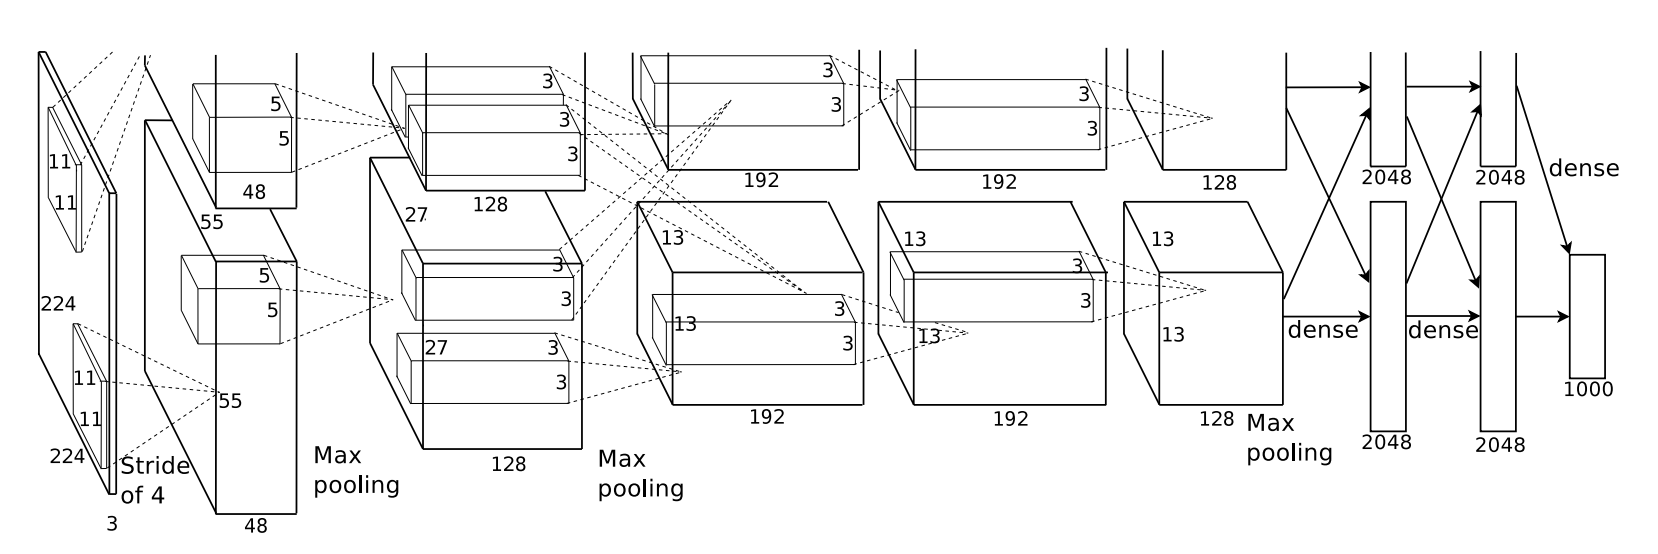

**Implementaciones en Keras:**
- [CaffeNet - One stream](https://gist.github.com/JBed/c2fb3ce8ed299f197eff) - Caffe (Framework de Berkeley)
- [Original - Two streams](https://github.com/dandxy89/ImageModels/blob/master/AlexNet_Original.py)

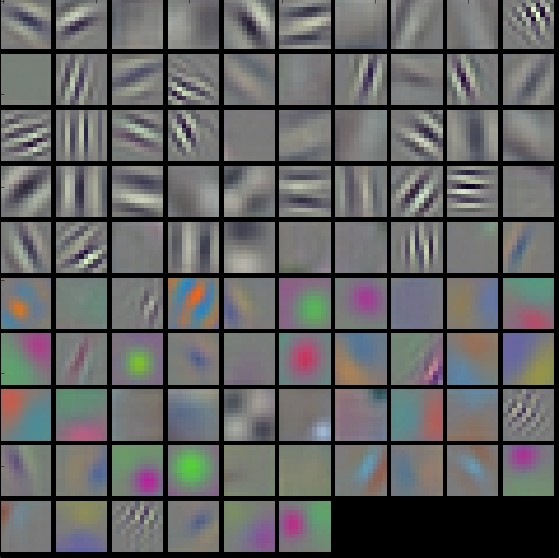

### [VGG](https://arxiv.org/pdf/1409.1556.pdf) - Visial Geometry Group - Oxford
- 2014
- Dos tipos 16 y 19 (16/19 capas)
- 7.3% error rate

**Lo novedoso**: Kernels de 3x3

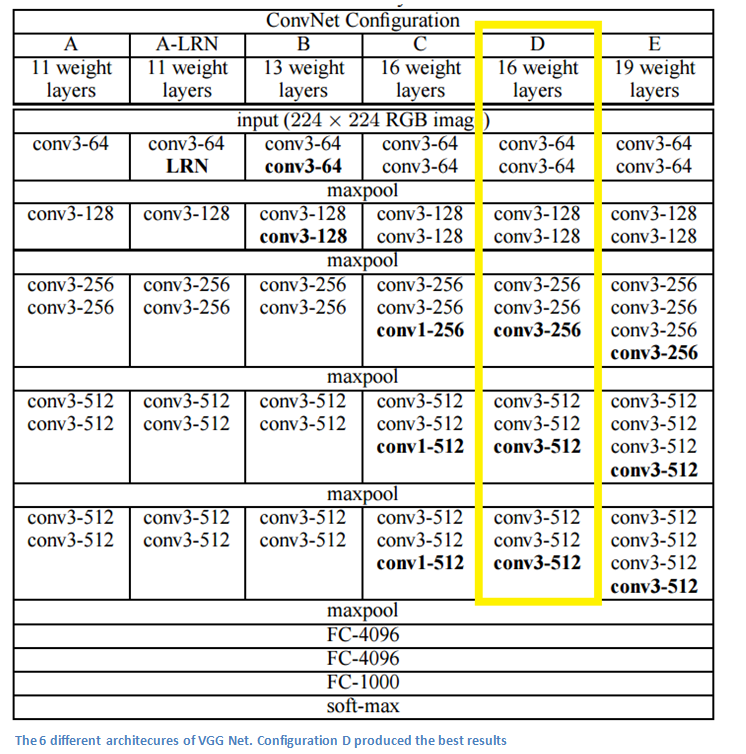

In [3]:
from keras import applications
model = applications.VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

# GoogLeNet (2015) 

- top 5 error rate of 6.7%
- Used 9 Inception modules (Parallel Streams) in the whole architecture, with over 100 layers in total! Now that is deep…
- No use of fully connected layers! They use an average pool instead, to go from a 7x7x1024 volume to a 1x1x1024 volume. This saves a huge number of parameters.
- Uses 12x fewer parameters than AlexNet.
- During testing, multiple crops of the same image were created, fed into the network, and the softmax probabilities were averaged to give us the final solution.
- Utilized concepts from R-CNN (a paper we’ll discuss later) for their detection model.
- There are updated versions to the Inception module (Versions 6 and 7).
- Trained on “a few high-end GPUs within a week”.
- https://www.tensorflow.org/tutorials/image_recognition

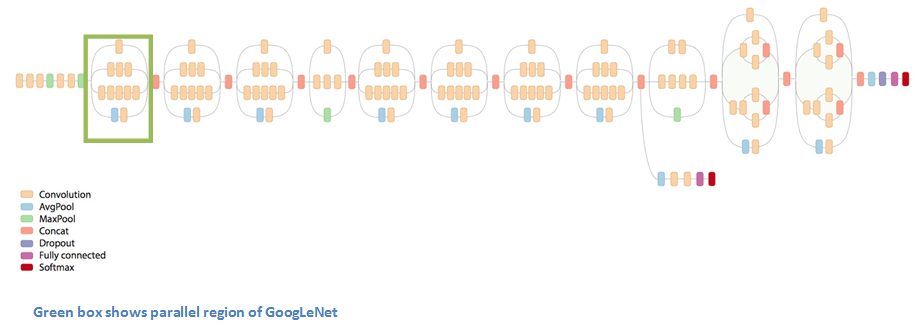

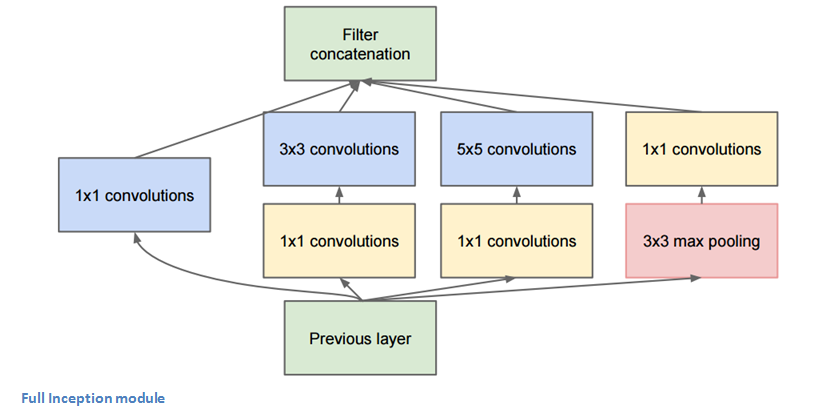

Detalles de Inception y Xception:
- https://medium.com/towards-data-science/an-intuitive-guide-to-deep-network-architectures-65fdc477db41

# Resnet (2015)
- “Ultra-deep” – Yann LeCun.
- 152 layers
- Trained on an 8 GPU machine for two to three weeks.
- 3.6% error rate
- Microsoft
- Vanishing Gradient (Resuelto puenteando)

# [Disponibles en Keras](https://keras.io/applications/)